In [1]:
# Import des librairies
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np

pd.set_option('display.max_columns', None)

In [7]:
# Installation module supplémentaire
!pip3 install plotly wordcloud

     |████████████████████████████████| 372 kB 1.2 MB/s eta 0:00:01


In [2]:
# Librairies supplémentaires
import os
import datetime
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from wordcloud import WordCloud

In [54]:
# Import du dataset (2017)
anime_dataset = pd.read_csv('AnimeList.csv').sort_values('title')
anime_dataset

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
3494,20707,"""0""",NaN,「0」,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Music,Unknown,1,Finished Airing,False,"Oct 23, 2013","{'from': '2013-10-23', 'to': '2013-10-23'}",2 min.,G - All Ages,4.83,1133,9186.0,6833,2028,1,NaN,NaN,NaN,[],Sony Music Entertainment,NaN,Minakata Laboratory,Music,[],[]
11101,25627,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",NaN,"""いそっぷ""のおはなしより 牛とかえる, よくばった犬",From Aesop&#039;s Tales: The Bull and the Frog...,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Unknown,1,Finished Airing,False,"Mar 21, 1970","{'from': '1970-03-21', 'to': '1970-03-21'}",12 min.,PG - Children,4.97,36,9532.0,11357,190,3,NaN,NaN,NaN,[],NaN,NaN,NaN,Kids,[],[]
6551,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",NaN,“文学少女”今日のおやつ 〜はつ恋〜,"Bungaku Shoujo OVA, Book Girl OVA, Literature ...",https://myanimelist.cdn-dena.com/images/anime/...,OVA,Light novel,1,Finished Airing,False,"Dec 26, 2009","{'from': '2009-12-26', 'to': '2009-12-26'}",15 min.,PG-13 - Teens 13 or older,7.00,8678,3550.0,2978,15973,12,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 10000, 'type': 'man...","Lantis, Pony Canyon, Enterbrain, Kadokawa Cont...",NaN,Production I.G,"Comedy, Fantasy, School",[],[]
6003,8481,"""Bungaku Shoujo"" Memoire",NaN,“文学少女”メモワール,"Book Girl: Memoire, Literature Girl: Memoire",https://myanimelist.cdn-dena.com/images/anime/...,OVA,Light novel,3,Finished Airing,False,"Jun 25, 2010 to Dec 24, 2010","{'from': '2010-06-25', 'to': '2010-12-24'}",24 min. per ep.,PG-13 - Teens 13 or older,7.46,10379,1749.0,2581,21328,27,"Each episode of ""Bungaku Shoujo"" Memoire recei...",NaN,NaN,"{'Adaptation': [{'mal_id': 10000, 'type': 'man...","Lantis, Pony Canyon, Enterbrain, Kadokawa Cont...",NaN,Production I.G,"Drama, Romance, School","['""Musou Garden (夢想庭園)"" by CooRie']","['#1: ""Kotonoha (言の葉)"" by KOKIA (ep 1)', '#2: ..."
2998,6408,"""Bungaku Shoujo"" Movie",NaN,劇場版“文学少女”,"Book Girl, Literature Girl",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Light novel,1,Finished Airing,False,"May 1, 2010","{'from': '2010-05-01', 'to': '2010-05-01'}",1 hr. 40 min.,PG-13 - Teens 13 or older,7.54,21077,1514.0,1556,48638,204,"""Bungaku Shoujo"" Movie was announced with the ...",NaN,NaN,"{'Adaptation': [{'mal_id': 10000, 'type': 'man...","Lantis, Pony Canyon, Enterbrain, Kadokawa Cont...",NaN,Production I.G,"Mystery, Drama, Romance, School",[],"['""Harukana Hibi (遥かな日々)"" by eufonius']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,6864,xxxHOLiC Rou,NaN,×××HOLiC・籠,xxxHOLiC Rou: Adayume,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,2,Finished Airing,False,"Apr 23, 2010 to Mar 9, 2011","{'from': '2010-04-23', 'to': '2011-03-09'}",35 min. per ep.,PG-13 - Teens 13 or older,8.30,21263,242.0,1674,43955,142,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 10, 'type': 'manga'...",Kodansha,NaN,Production I.G,"Mystery, Supernatural","['""Adayume"" by Shikao Suga (ep 2)']","['#1: ""Kaza Nagi"" by Shikao Suga (ep 1)', '#2:..."
384,4918,xxxHOLiC Shunmuki,NaN,xxxHOLiC 春夢記,xxxHOLiC OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,2,Finished Airing,False,"Feb 17, 2009 to Jun 23, 2009","{'from': '2009-02-17', 'to': '2009-06-23'}",26 min. per ep.,PG-13 - Teens 13 or older,8.15,23974,378.0,1592,47208,94,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 10, 'type': 'manga'...",Kodansha,NaN,Production I.G,"Mystery, Comedy, Psychological, Supernatural, ...","['""sofa"" by Suga Shikao']","['""Cherish"" by AZU']"
10068,29708,Üks Uks,NaN,Üks Uks,"Uks Uks, One Door",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Unknown,1,Finished Airing,False,2003,"{'from': None, 'to': None

In [37]:
anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14478 entries, 3494 to 4108
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-nul

In [42]:
# Import du dataset user anime list (2017)
# for chunk in pd.read_csv('UserAnimeList.csv', chunksize=10)
userlist_dataset = pd.read_csv('UserAnimeList.csv', nrows=600000)
userlist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   username             600000 non-null  object 
 1   anime_id             600000 non-null  int64  
 2   my_watched_episodes  600000 non-null  int64  
 3   my_start_date        600000 non-null  object 
 4   my_finish_date       600000 non-null  object 
 5   my_score             600000 non-null  int64  
 6   my_status            600000 non-null  int64  
 7   my_rewatching        476661 non-null  float64
 8   my_rewatching_ep     600000 non-null  int64  
 9   my_last_updated      600000 non-null  int64  
 10  my_tags              58127 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 50.4+ MB


In [6]:
# 1 = title, 15 = score, 17 = rank, 18 = popularity
title_score = anime_dataset.iloc[:,[1, 15, 17, 18]]
title_score.sort_values('score')

,title,score,rank,popularity
14384,Chikyuu to no Yakusoku,0.00,9913.0,14468
1989,Kenja no Mago,0.00,NaN,6019
2456,Kengan Ashura,0.00,NaN,8984
5440,Starly Girls: Episode Starsia,0.00,NaN,11361
5353,Starmyu 3rd Season,0.00,NaN,6693
...,...,...,...,...
14403,Dokidoki Little Ooyasan,9.52,NaN,10273
548,Manichi ga Tsurai Kimochi Wakarimasu ka: Yurus...,10.00,11178.0,14276
14407,Ittekimasu,10.00,10657.0,14369
14467,Kyouiku Eiga-sai Jushou Anime Series,10.00,11091.0,14372


In [11]:
# 0 = anime_id, 1 = title, 15 = score, 16 = scored_by, 17 = rank, 18 = popularity
# On affiche ici les 20 animes les plus populaires avec plus de 10000 votes
title_score = anime_dataset.iloc[:,[0, 1, 15, 16, 17, 18]]
top20_anime = title_score.query('scored_by > 10000').sort_values('rank', ascending=True).head(20)
top20_anime

,anime_id,title,score,scored_by,rank,popularity
2555,5114,Fullmetal Alchemist: Brotherhood,9.25,733592,1.0,4
1028,32281,Kimi no Na wa.,9.19,471398,2.0,33
1252,28977,Gintama°,9.15,71751,3.0,383
6177,30484,Steins;Gate 0,9.15,26739,4.0,323
2999,9253,Steins;Gate,9.14,563857,5.0,8
12724,820,Ginga Eiyuu Densetsu,9.11,29036,6.0,671
8992,9969,Gintama&#039;,9.11,92025,7.0,342
418,11061,Hunter x Hunter (2011),9.11,403377,8.0,35
1307,35180,3-gatsu no Lion 2nd Season,9.10,30779,9.0,990
5783,15417,Gintama&#039;: Enchousen,9.07,63468,10.0,685


In [21]:
# On affiche ici la ligne de l'anime le meilleur score
best_anime = top20_anime[top20_anime.score == top20_anime['score'].max()]
best_anime

,anime_id,title,score,scored_by,rank,popularity
2555,5114,Fullmetal Alchemist: Brotherhood,9.25,733592,1.0,4


In [26]:
# On affiche ici l'anime le plus populaire
most_popular_anime = title_score[title_score.popularity == 1]
most_popular_anime

,anime_id,title,score,scored_by,rank,popularity
7913,1535,Death Note,8.67,1009477,51.0,1


<AxesSubplot:xlabel='my_score'>

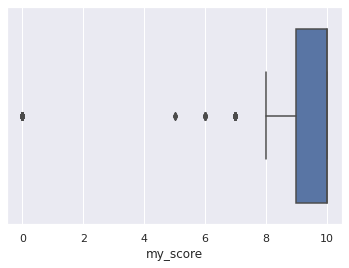

In [27]:
# On affiche ici une boite à moustache de la note données à l'anime le plus populaire par les users
filtered_list = userlist_dataset.query('anime_id == 5114 and my_watched_episodes == 64')
sns.set()
sns.boxplot(x='my_score', data=filtered_list)

<AxesSubplot:xlabel='my_score'>

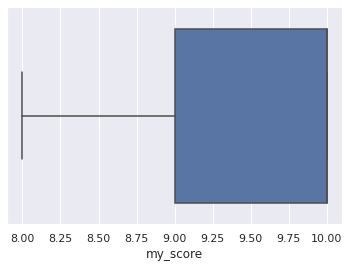

In [65]:
# Boxplot sans valeur abérante
sns.boxplot(x='my_score', data=filtered_list.query('my_score > 7'))

<AxesSubplot:>

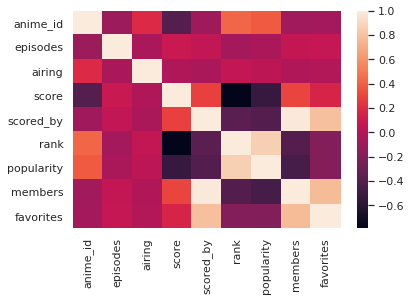

In [38]:
# Heatmap
sns.heatmap(anime_dataset.corr())

In [43]:
# Matrice de correlation
anime_dataset.corr()

,anime_id,episodes,airing,score,scored_by,rank,popularity,members,favorites
anime_id,1.000000,-0.095454,0.194987,-0.396514,-0.080363,0.420506,0.379246,-0.075036,-0.057402
episodes,-0.095454,1.000000,-0.029175,0.093627,0.058509,-0.062470,-0.032186,0.066346,0.075671
airing,0.194987,-0.029175,1.000000,-0.020391,-0.028003,0.065441,0.044042,-0.016214,-0.000993
score,-0.396514,0.093627,-0.020391,1.000000,0.285609,-0.789713,-0.527804,0.305482,0.165895
scored_by,-0.080363,0.058509,-0.028003,0.285609,1.000000,-0.363261,-0.405031,0.986645,0.792070
rank,0.420506,-0.062470,0.065441,-0.789713,-0.363261,1.000000,0.862900,-0.402453,-0.194510
popularity,0.379246,-0.032186,0.044042,-0.527804,-0.405031,0.862900,1.000000,-0.455151,-0.195886
members,-0.075036,0.066346,-0.016214,0.305482,0.986645,-0.402453,-0.455151,1.000000,0.776165
favorites,-0.057402,0.075671,-0.000993,0.165895,0.792070,-0.194510,-0.195886,0.776165,1.000000


In [64]:
anime_rank_100 = anime_dataset[anime_dataset.popularity!=0].sort_values(by='rank').head(100).loc[:,['popularity','rank', 'title','type', 'source', 'scored_by','favorites','score']]
# popularity_and_rank_100 = anime_rank_100[(anime_rank_100.popularity <= 100)]
popularity_and_rank_100 = anime_rank_100.query('popularity <= 100')
popularity_and_rank_100["point"] = (popularity_and_rank_100["scored_by"] * popularity_and_rank_100["favorites"] * popularity_and_rank_100["score"]) / 10000000000
popularity_and_rank_100.sort_values('point', ascending=False)

<ipython-input-64-ae2132ef60fc>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,popularity,rank,title,type,source,scored_by,favorites,score,point
7913,1,51.0,Death Note,TV,Manga,1009477,88696,8.67,77.628208
2555,4,1.0,Fullmetal Alchemist: Brotherhood,TV,Manga,733592,106895,9.25,72.536018
2999,8,5.0,Steins;Gate,TV,Visual novel,563857,92423,9.14,47.631607
13726,9,30.0,Code Geass: Hangyaku no Lelouch,TV,Original,627740,63614,8.79,35.101153
34,35,91.0,One Piece,TV,Manga,423868,69760,8.54,25.251953
418,35,8.0,Hunter x Hunter (2011),TV,Manga,403377,64375,9.11,23.656296
7403,22,18.0,Code Geass: Hangyaku no Lelouch R2,TV,Original,543904,44230,8.95,21.530902
10918,24,41.0,Tengen Toppa Gurren Lagann,TV,Original,449656,50040,8.74,19.665687
8863,5,44.0,One Punch Man,TV,Web manga,691845,30747,8.73,18.570594
2783,55,14.0,Clannad: After Story,TV,Visual novel,363239,47380,9.01,15.506448


In [61]:
data = [
    {
        'y':popularity_and_rank_100["popularity"],
        'x': popularity_and_rank_100["rank"],
        'mode': 'markers',
        'marker': {
            'color': popularity_and_rank_100["popularity"],
            'size':  popularity_and_rank_100["point"],
            'showscale': True,
            'sizemin':4
        },
        "text" :  popularity_and_rank_100["title"]
    }
]

layout = go.Layout(title='Rang des animes par popularité pour les 100 animes les plus populaires',
                   xaxis=dict(title='Rank'),
                   yaxis=dict(title='Popularity'),
                   autosize=False,
                   width=800,
                   height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [57]:
df_title = popularity_and_rank_100['title'].astype("str").tolist()
df_point  = popularity_and_rank_100['point'].astype("int32").tolist()

list_popularity_and_rank_100 = []

for i in range(len(df_point)):
    for j in range(df_point[i]):
        list_popularity_and_rank_100.append(df_title[i])

list_popularity_and_rank_100

['Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 'Fullmetal Alchemist: Brotherhood',
 

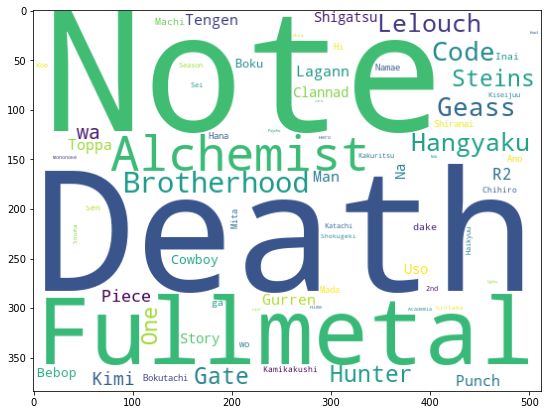

In [19]:
# Nuage de mots des animes les plus populaires
plt.subplots(figsize=(14,7))
wordcloud = WordCloud(    collocations=False,
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(list_popularity_and_rank_100))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

<AxesSubplot:xlabel='rank', ylabel='popularity'>

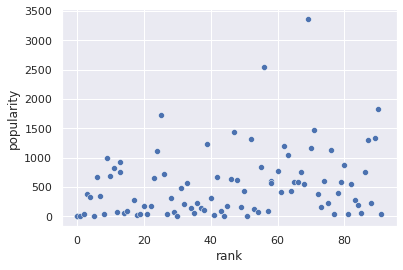

In [44]:
# Nuage de point du rang des animes par rapport à leur popularité
sns.scatterplot(x='rank', y='popularity', data=anime_dataset.sort_values('rank').head(100))

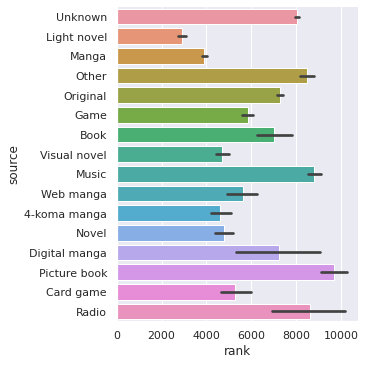

In [45]:
# Rang des animes en fonction de leur source original
sns.catplot(x='rank', y='source', kind='bar', data=anime_dataset)